<a href="https://colab.research.google.com/github/Busettyvivek/Machine-Learning-Projects/blob/main/Car_Price_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
df=pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(keep=False,inplace=True)

In [ ]:
df.shape

(297, 9)

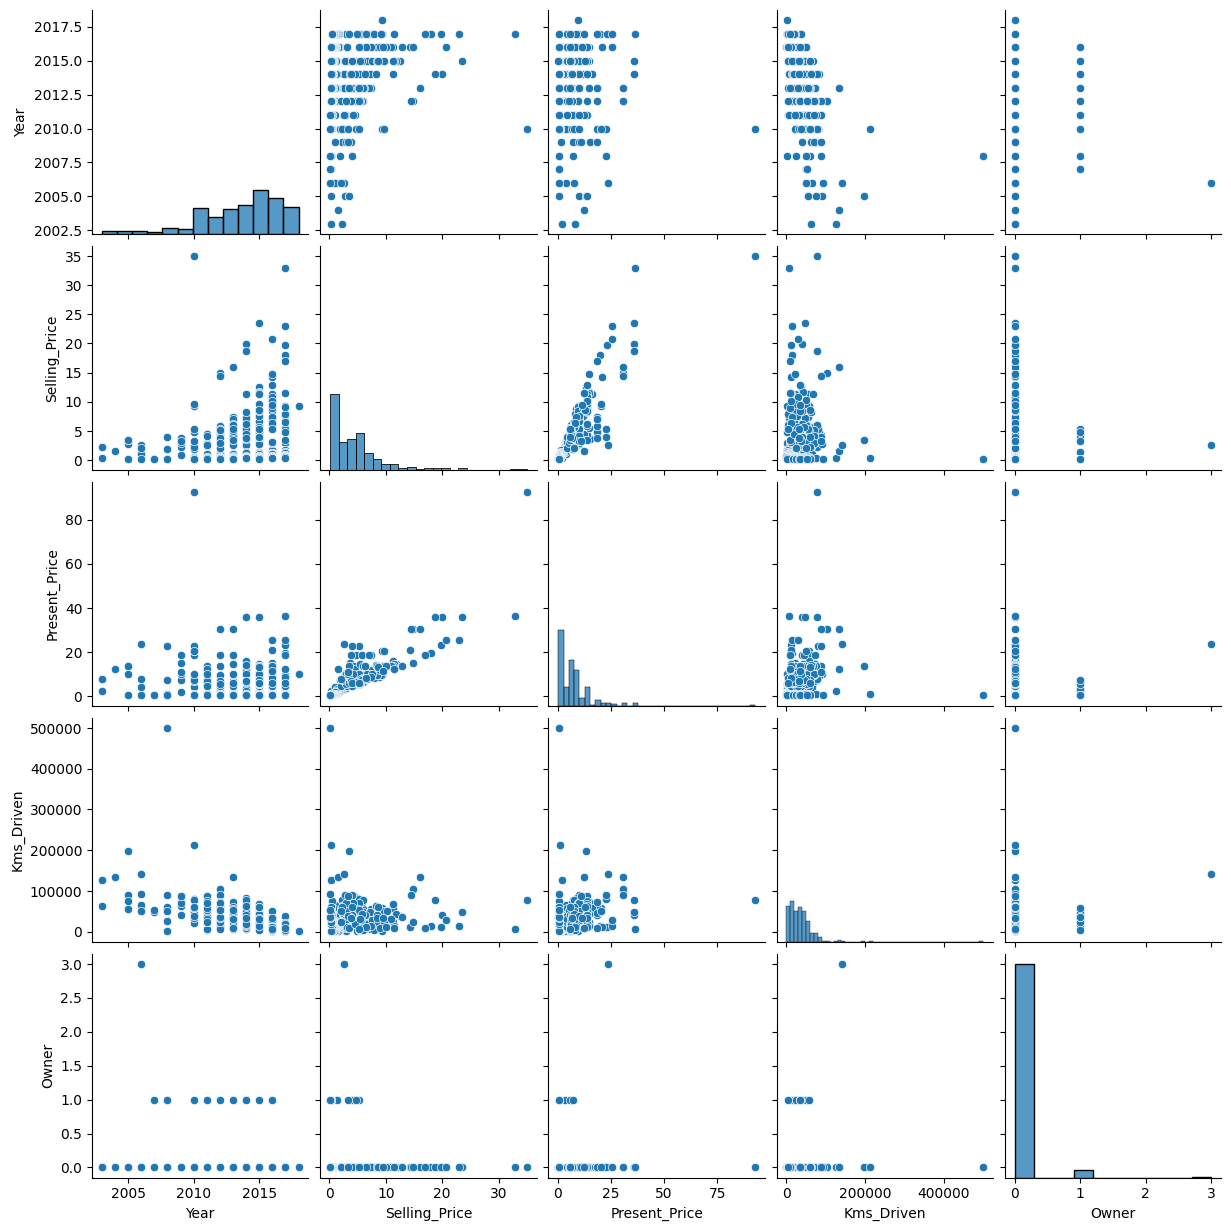

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Seller_Type', ylabel='Fuel_Type'>

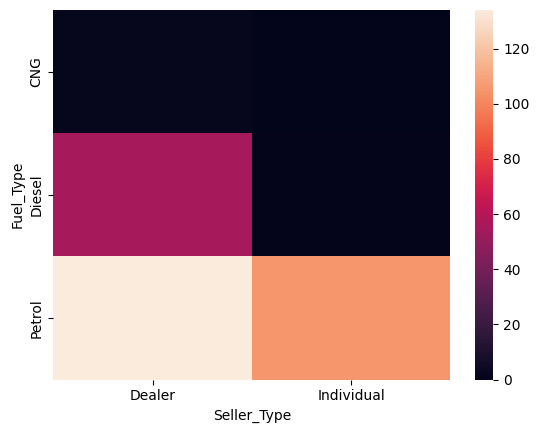

In [ ]:
sns.heatmap(pd.crosstab(df['Fuel_Type'],df['Seller_Type']))

<Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>

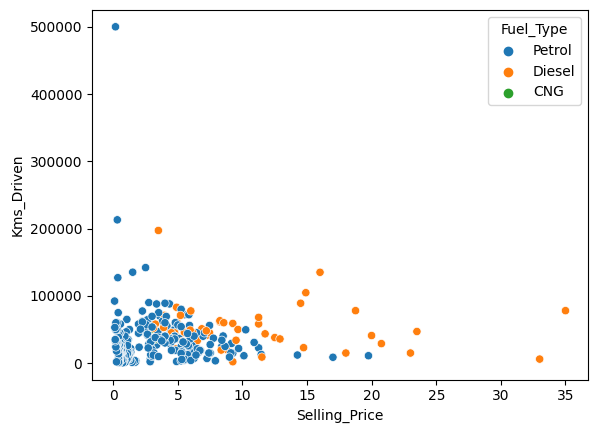

In [ ]:
sns.scatterplot(x=df['Selling_Price'],y=df['Kms_Driven'],hue=df['Fuel_Type'])

In [ ]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     56
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
df['Seller_Type'].value_counts()

Dealer        191
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
df['Transmission'].value_counts()

Manual       259
Automatic     38
Name: Transmission, dtype: int64

In [ ]:
# encoding our categorical data into numeric on fueltype,sellertype,transmission

In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Linear Regression
regression=LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=regression.predict(x_train)

In [ ]:
score=metrics.r2_score(y_train,y_pred)

In [ ]:
score

0.871073246835247

<Axes: xlabel='Selling_Price'>

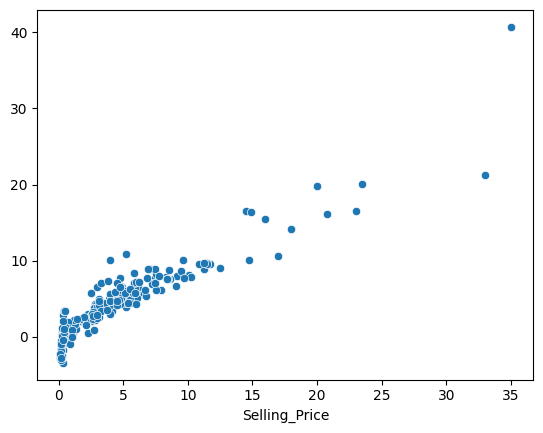

In [ ]:
sns.scatterplot(x=y_train,y=y_pred)

In [ ]:
x_pred=regression.predict(x_test)

In [ ]:
test_score=metrics.r2_score(y_test,x_pred)

In [ ]:
test_score

0.8803561964412667